# Keras
- Keras is a Python library that makes building neural networks with TensorFlow easy.


- Get the MNIST data working on Keras

**A lot of parameters!** Features and knobs to turn and tweak with ANNs! 

**Keras isn't a super large library**, unlike TensorFlow, and it is **used to access TensorFlow easily**.

- **Keras has layers** which is super important!

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

- X data here the same as yesterday (XOR dataset). These are both floating point numbers!

### As a rule of thumb you have to scale your data with ANNs or it doesn't work! Scaled to between 0 and 1!

In [3]:
X = np.array([[0.0, 0.0], 
              [1.0, 0.0], 
              [0.0, 1.0], 
              [1.0, 1.0]], dtype=np.float64)

y = np.array([0.0, 1.0, 1.0, 1.0], dtype=np.float64)

- **Sequential model** means we have one layer of neurons on the left, then another, then another...
    - There are also non-sequential models (branches, etc...)

- In this case, **Dense 4 means we have 4 neurons**, and they are connected to all inputs! 

- **Input_shape** is = (2, ) - takes into account X and y. It is the number of columns! For the MNIST data we would need to input (784, ) or (28, 28)

In [6]:
model = Sequential([
    Dense(4, input_shape=(2,)),
    Activation('sigmoid'),
    Dense(1),
    Activation('sigmoid'),
])

- This prints your model and tells you how many layers you have etc...

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In the compile part, we ask: What kind of gradient descent algorithm do I want to use? 
- 'rmsprop' and we specified the loss 

In [7]:
model.compile(optimizer='rmsprop', loss='mse') # initialises the model

hist = model.fit(X, y, epochs=50, batch_size=4, verbose=1) 
# starts training the model
#epochs tells us how many iterations to run through

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
4/4 [==============================] - 1s 125ms/step - loss: 0.3041
Epoch 2/50
4/4 [==============================] - 0s 286us/step - loss: 0.3019
Epoch 3/50
4/4 [==============================] - 0s 446us/step - loss: 0.3004
Epoch 4/50
4/4 [==============================] - 0s 456us/step - loss: 0.2991
Epoch 5/50
4/4 [==============================] - 0s 432us/step - loss: 0.2979
Epoch 6/50
4/4 [==============================] - 0s 520us/step - loss: 0.2969
Epoch 7/50
4/4 [==============================] - 0s 296us/step - loss: 0.2959
Epoch 8/50
4/4 [==============================] - 0s 343us/step - loss: 0.2950
Epoch 9/50
4/4 [==============================] - 0s 332us/step - loss: 0.2941
Epoch 10/50
4/4 [==============================] - 0s 341us/step - loss: 0.2932
Epoch 11/50
4/4 [==============================] - 0s 641us/step - loss: 0.2924
Epoch 12/50
4/4 [==============================] - 0s 461us/step - loss: 0.2916
E

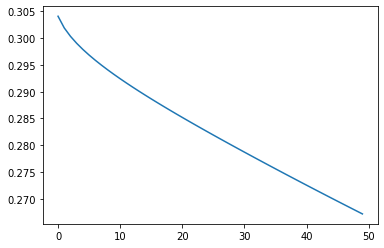

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])

In [9]:
# let's increase number of epochs!
hist = model.fit(X, y, epochs=500, batch_size=4, verbose=0)

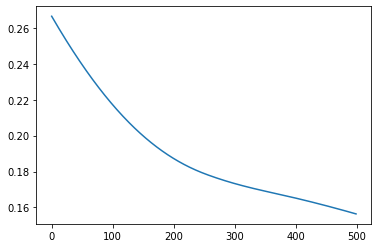

In [10]:
plt.plot(hist.history['loss'])

In [11]:
# Now increase to 5000!
hist = model.fit(X, y, epochs=5000, batch_size=4, verbose=0)

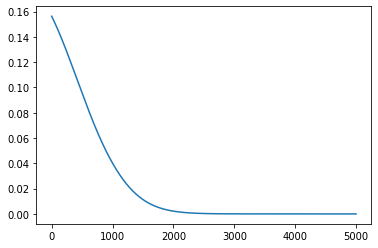

In [12]:
plt.plot(hist.history['loss'])

#### Batch_size is something to do with the back propagation!

This is the loss:

In [13]:
score = model.evaluate(X, y, batch_size=4)
print(score) #Loss! 

4/4 [==============================] - 0s 5ms/step
6.494092019693198e-08


In [14]:
print(model.predict(X))

[[3.6334095e-04]
 [9.9975783e-01]
 [9.9974078e-01]
 [9.9995637e-01]]


### Now let's do this for the XOR function!

In [15]:
X = np.array([[0.0, 0.0], 
              [1.0, 0.0], 
              [0.0, 1.0], 
              [1.0, 1.0]], dtype=np.float64)

y = np.array([0.0, 1.0, 1.0, 1.0], dtype=np.float64)

## K.clear_session( ) - this deletes everthing about your model!


In [16]:
# This deletes everthing about your model!
from keras import backend as K 

K.clear_session()

In [17]:
model = Sequential([
    Dense(4, input_shape=(2,)),
    Activation('sigmoid'),
    Dense(1),
    Activation('sigmoid'),
])

In [18]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse', 'acc']) 

histXOR = model.fit(X, y, epochs=5000, batch_size=4, verbose=0)

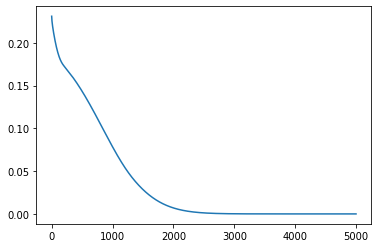

In [19]:
plt.plot(histXOR.history['loss'])

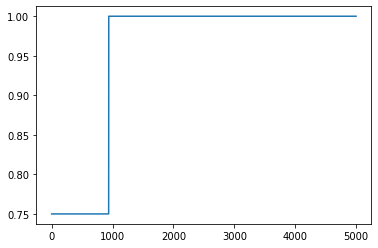

In [20]:
plt.plot(histXOR.history['acc'])

#### Goes up because the network got to the right result

In [21]:
score = model.evaluate(X, y, batch_size=4)
print(score)

4/4 [==============================] - 0s 5ms/step
[1.1196128468782263e-07, 1.1196128468782263e-07, 1.0]


In [22]:
print(model.predict(X))

[[5.3250155e-04]
 [9.9973696e-01]
 [9.9969256e-01]
 [9.9997592e-01]]


### Input shape
The input_shape parameter is the one causing beginners the most headaches.

- it must be specified in the first layer
- it must not be specified in any other layer
- it contains the shape of the input, but without the first dimension
- the first dimension of your input data must be the data points
- if your data has only two dimensions, input_shape still must be written as a tuple, e.g. (2, )
- if your data has only one dimension, you may have to reshape your data to (n, 1) with NumPy.

### Resetting the model
When you build several models in the same session, it is worth clearing the session in between:

In [ ]:
# from keras import backend as K

# K.clear_session()

### The model summary
To view all layers and the number of parameters, write:

In [23]:
# model.summary()

It results in a table like:

| Layer (type) | Output Shape | Param # |
|--------------|--------------|---------|
| dense_1 (Dense) | (None, 100) | 78500 |
| batch_normalization_1 (Batch) | (None, 100) | 400 |
| activation_1 (Activation) | (None, 100) | 0 | 

### Writing a Keras model

First install H5PY:

`pip install h5py`

Then save the model as a JSON file (containing the structure) and a H5 file (containing the parameters).

In [ ]:
# # serialize model to JSON
# with open("model.json", "w") as json_file:
#     json_file.write(model.to_json())
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

### Loading a saved Keras model

In [ ]:
# from keras.models import model_from_json

# # load json and create model
# with open('model.json', 'r') as f:
#    json = f.read()
# model = model_from_json(json)

# # load weights into new model
# model.load_weights("model.h5")

# model.compile(...)

### Mini-Batches and Epochs
An efficient way to train a neural network is to feed small subsets of the training data. It is a variant of stochastic gradient descent. These subsets are called mini-batches.

Mini-batches are used, because using one data point at a time would take too long, but the gradients for all data points might consume too much memory.

When the backpropagation algorithm has processed every data point once, one training epoch is finished. Training a neural nework usually requires multiple epochs.

Mini-batch size and number of epochs are two important hyperparameters in Keras.

**Hint:** You would usually want to set the number of epochs as low as possible, but the mini-batch-size as high as possible.

### Examining model weights
Model weights can be comfortably viewed as histograms via TensorBoard. However, if you require a different representation, you may prefer to access weights directly.

In [ ]:
# # save a list of np.arrays with the weights
# w = model.get_weights()

# # see the underlying TensorFlow variables
# model.weights

# # extract the names of the TF variables
# [v.name for v in model.weights]

# # plot weights of one layer (for MNIST)
# import matplotlib.pyplot as plt

# plt.imshow(w[0].reshape((28, 28)))
# plt.show()